In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
dataset = pd.read_csv(r'C:\Users\shark\Desktop\ML Learn\WSCubeTech Part 2\Dataset\Social_Network_Ads.csv')

In [83]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [84]:
dataset.drop(['User ID','Gender'], axis=1, inplace=True)
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [85]:
dataset.isnull().sum()  

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

plotting

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

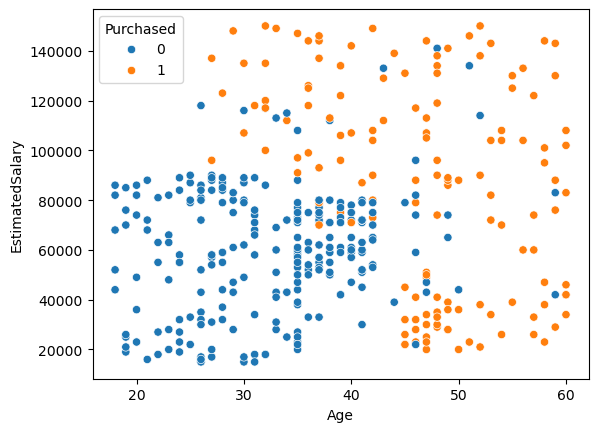

In [86]:
sns.scatterplot(x='Age', y='EstimatedSalary', data=dataset, hue='Purchased')

In [87]:
x = dataset.iloc[:, :-1]
y = dataset['Purchased']

In [88]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [89]:
x = pd.DataFrame(x, columns=['Age', 'EstimatedSalary'])
x.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [90]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [92]:
knn.score(x_test, y_test)*100

91.25

In [93]:
for i in range(1, 20):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(x_train, y_train)
    print('For', i, 'Test Accuracy is:', knn1.score(x_test, y_test)*100)
    print('For', i, 'Train Accuracy is:', knn1.score(x_train, y_train)*100)
    print("--------------------------------------------------")

For 1 Test Accuracy is: 85.0
For 1 Train Accuracy is: 99.6875
--------------------------------------------------
For 2 Test Accuracy is: 86.25
For 2 Train Accuracy is: 91.5625
--------------------------------------------------
For 3 Test Accuracy is: 91.25
For 3 Train Accuracy is: 92.5
--------------------------------------------------
For 4 Test Accuracy is: 92.5
For 4 Train Accuracy is: 91.875
--------------------------------------------------
For 5 Test Accuracy is: 92.5
For 5 Train Accuracy is: 90.9375
--------------------------------------------------
For 6 Test Accuracy is: 90.0
For 6 Train Accuracy is: 90.9375
--------------------------------------------------
For 7 Test Accuracy is: 93.75
For 7 Train Accuracy is: 91.875
--------------------------------------------------
For 8 Test Accuracy is: 92.5
For 8 Train Accuracy is: 90.625
--------------------------------------------------
For 9 Test Accuracy is: 93.75
For 9 Train Accuracy is: 91.25
--------------------------------------

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


<Axes: >

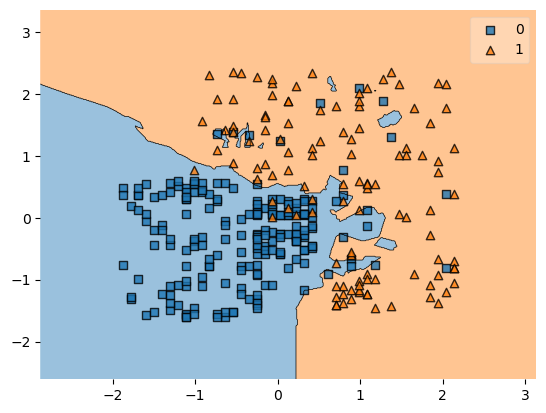

In [94]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train.values, y_train.values, clf=knn)